In [48]:
import numpy as np
import matplotlib.pyplot as plt

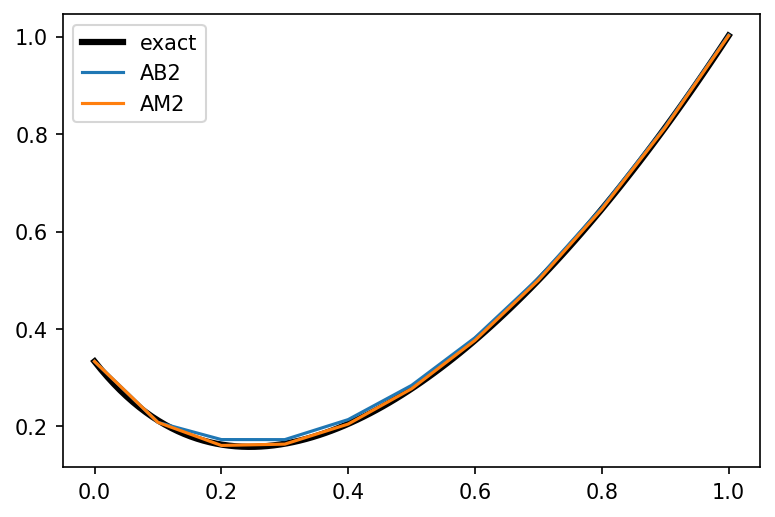

In [47]:
plt.figure(dpi=150)
plt.plot(t_grid,y, label='exact', c='black', lw='3')
plt.plot(mesh,AB2_y, label='AB2')
plt.plot(mesh,AM2_y, label='AM2')
plt.legend()
plt.show() ### see code below the plot

In [44]:
#define a private RK4 function to compute y1 to start AB2
def _rk4(f,h,t,y0):
        s1 = f(t,y0)
        s2 = f(t+h/2, y0+(h/2*s1))
        s3 = f(t+h/2, y0+(h/2*s2))
        s4 = f(t, y0+(h*s3))
        y_i = y0 + h*(1/6*s1 + 1/3*s2 + 1/3*s3 + 1/6*s4)
        return y_i


def AB2(f, h, a, b, y0):
    N = int((b-a)/h)
    mesh = [a+(i*h) for i in range(N+1)]
    
    y1 = _rk4(f,h,a,y0)
    y = [y0, y1]
    for t in range(len(mesh)-1):
        if (t == float(a)) or (t == float(a+h)): continue
        t_i = mesh[t]
        t_prev = mesh[t-1]
        y2 =  y1 + h/2*(3*f(t_i,y1) - f(t_prev, y0))
        y.append(y2)
        y0 = y1
        y1 = y2
        
    return y


def AM2(f, h, a, b, y0):
    N = int((b-a)/h)
    mesh = [a+(i*h) for i in range(N+1)]
    
    y1 = _rk4(f,h,a,y0)
    y = [y0, y1]
    for t in range(len(mesh)-1):
        if (t == float(a)) or (t == float(a+h)): continue
        t_i = mesh[t]
        t_prev = mesh[t-1]
        t_next = mesh[t+1]
        
        y2 = ( y1 + (h/12)*( 25*(t_next**2) + 10*t_next - 40*y1 + 40*(t_i**2) + 16*t_i + 5*y0 - 5*(t_prev**2) - 2*t_prev ) ) / (1 + 25*h/12)
        y.append(y2)
        y0 = y1
        y1 = y2
    
    return y

In [3]:
def y_exact(t):
    return t**2 + (1/3)*np.exp(-5*t)

def f(t,y):
    return -5*y + 5*(t**2) + 2*t

In [45]:
y0=1/3; a=0; b=1; h=0.1
N = int((b-a)/h)
mesh = [a+(i*h) for i in range(N+1)]

AB2_y = AB2(f,h,a,b,y0)
AM2_y = AM2(f,h,a,b,y0)
t_grid = np.linspace(a,b,100)
y = [y_exact(t) for t in t_grid]